### Importação dos dados



In [60]:
import matplotlib.pyplot as plt
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento



In [61]:
fat_total = loja['Preço'].sum()
fat2_total = loja2['Preço'].sum()
fat3_total = loja3['Preço'].sum()
fat4_total = loja4['Preço'].sum()
print(fat_total)

1534509.12


# 2. Vendas por Categoria

In [62]:
fat_prod = loja.groupby('Categoria do Produto')['Preço'].sum()
fat2_prod = loja.groupby('Categoria do Produto')['Preço'].sum()
fat3_prod = loja.groupby('Categoria do Produto')['Preço'].sum()
fat4_prod = loja.groupby('Categoria do Produto')['Preço'].sum()
print(fat_prod)

Categoria do Produto
brinquedos                23993.78
eletrodomesticos         484913.36
eletronicos              572659.23
esporte e lazer           52387.55
instrumentos musicais    121731.69
livros                    11713.92
moveis                   250178.11
utilidades domesticas     16931.48
Name: Preço, dtype: float64


# 3. Média de Avaliação das Lojas


In [63]:
rating = loja['Avaliação da compra'].mean()
rating2 = loja2['Avaliação da compra'].mean()
rating3 = loja3['Avaliação da compra'].mean()
rating4 = loja4['Avaliação da compra'].mean()
print(rating)

3.976685036032217


# 4. Produtos Mais e Menos Vendidos

In [64]:
produto_counts_loja1 = loja['Produto'].value_counts()
produto_counts_loja2 = loja2['Produto'].value_counts()
produto_counts_loja3 = loja3['Produto'].value_counts()
produto_counts_loja4 = loja4['Produto'].value_counts()

In [65]:
produto_count_dict = {'Loja 1': produto_counts_loja1, 'Loja 2': produto_counts_loja2, 'Loja 3': produto_counts_loja3, 'Loja 4': produto_counts_loja4}
produto_counts = pd.concat(produto_count_dict, axis=1)

In [66]:
loja_mais_vendeu = produto_counts.idxmax(axis=1)
loja_menos_vendeu = produto_counts.idxmin(axis=1)
print(loja_mais_vendeu)
print(loja_menos_vendeu)

Produto
Micro-ondas                    Loja 2
TV Led UHD 4K                  Loja 1
Guarda roupas                  Loja 1
Secadora de roupas             Loja 1
Cômoda                         Loja 1
Blocos de montar               Loja 1
Bola de basquete               Loja 1
Bicicleta                      Loja 1
Copo térmico                   Loja 1
Geladeira                      Loja 1
Impressora                     Loja 1
Bateria                        Loja 2
Faqueiro                       Loja 4
Carrinho controle remoto       Loja 4
Modelagem preditiva            Loja 3
Fone de ouvido                 Loja 1
Xadrez de madeira              Loja 1
Celular Plus X42               Loja 2
Lava louças                    Loja 3
Lavadora de roupas             Loja 2
Guitarra                       Loja 1
Violão                         Loja 2
Sofá retrátil                  Loja 4
Cadeira de escritório          Loja 2
Fogão                          Loja 3
Cama box                       Loja 4
Kit 

# 5. Frete Médio por Loja

In [67]:
frete_medio = loja['Frete'].mean()
frete2_medio = loja2['Frete'].mean()
frete3_medio = loja3['Frete'].mean()
frete4_medio = loja4['Frete'].mean()
print(frete_medio)

34.69180491551149


# Gráficos:

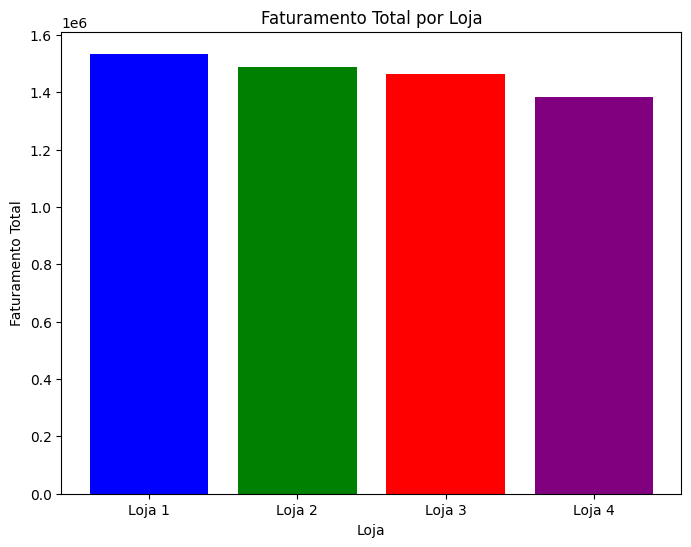

In [68]:
receita_total = {
    'Loja 1': fat_total,
    'Loja 2': fat2_total,
    'Loja 3': fat3_total,
    'Loja 4': fat4_total
}

plt.figure(figsize=(8, 6))
plt.bar(receita_total.keys(), receita_total.values(), color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Loja')
plt.ylabel('Faturamento Total')
plt.title('Faturamento Total por Loja')
plt.show()

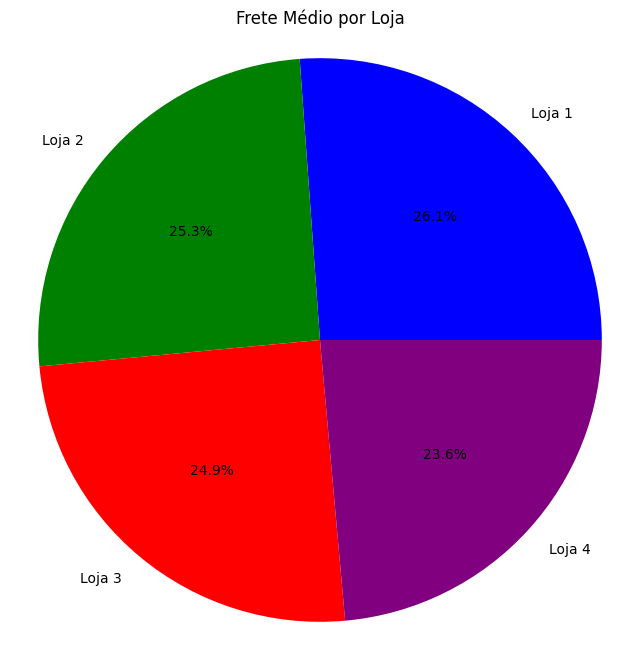

In [69]:
frete_medio = {
    'Loja 1': frete_medio,
    'Loja 2': frete2_medio,
    'Loja 3': frete3_medio,
    'Loja 4': frete4_medio
}

plt.figure(figsize=(8, 8))
plt.pie(list(frete_medio.values()), labels=frete_medio.keys(), autopct='%1.1f%%', colors=['blue', 'green', 'red', 'purple'])
plt.title('Frete Médio por Loja')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

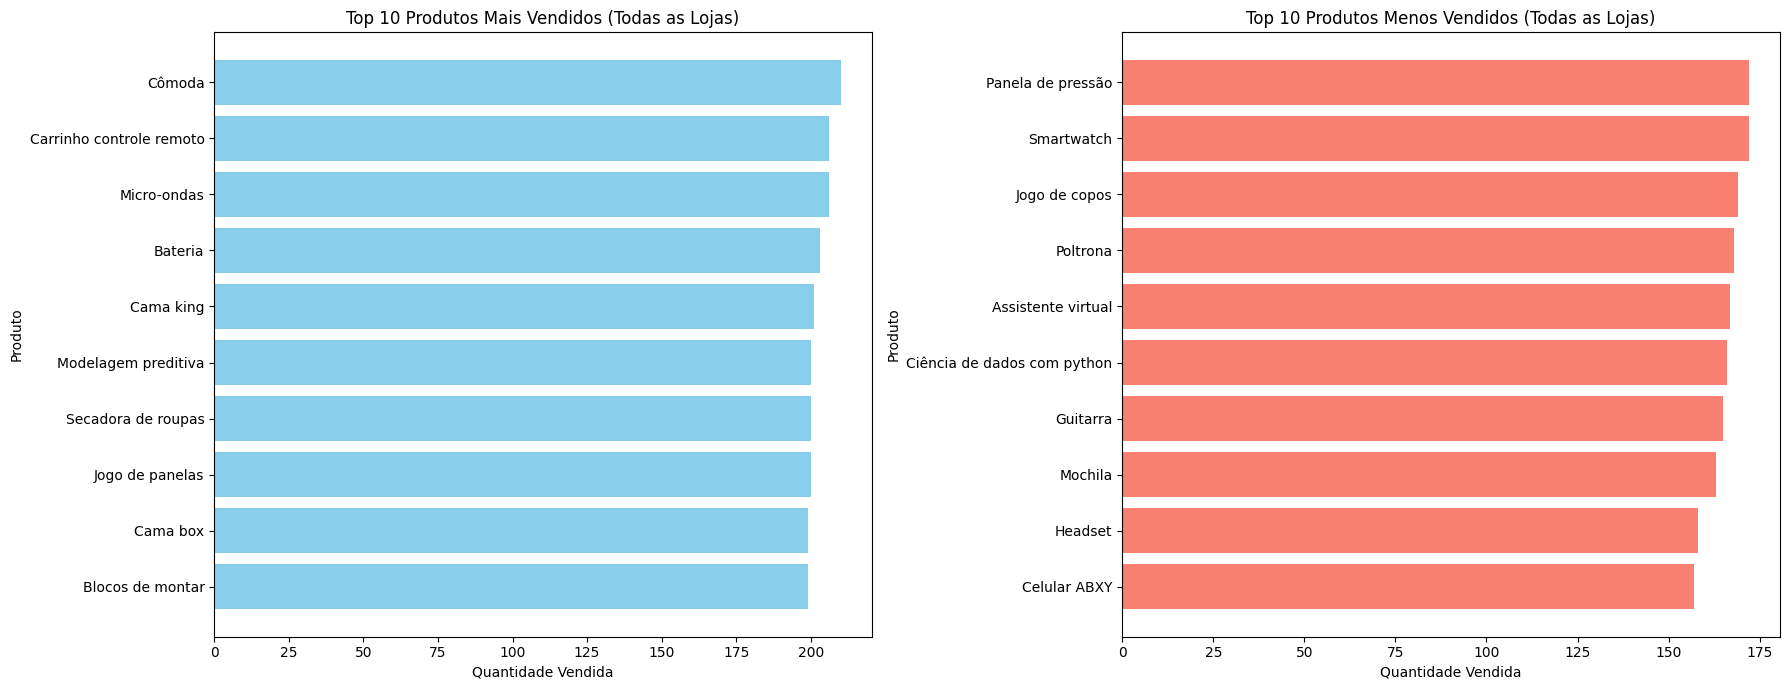

In [70]:
total_product_sales = produto_counts.sum(axis=1).sort_values(ascending=False)

top_products = total_product_sales.head(10)
bottom_products = total_product_sales.tail(10)

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

axes[0].barh(top_products.index, top_products.values, color='skyblue')
axes[0].set_xlabel('Quantidade Vendida')
axes[0].set_ylabel('Produto')
axes[0].set_title('Top 10 Produtos Mais Vendidos (Todas as Lojas)')
axes[0].invert_yaxis()

axes[1].barh(bottom_products.index, bottom_products.values, color='salmon')
axes[1].set_xlabel('Quantidade Vendida')
axes[1].set_ylabel('Produto')
axes[1].set_title('Top 10 Produtos Menos Vendidos (Todas as Lojas)')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()